In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#Palettable库中颜色条分为16大类,其中之一是palettable.colorbrewer.qualitative
from palettable.colorbrewer.qualitative import Dark2_7
import xarray as xr
import seaborn as sns
#Seaborn是一个用于数据可视化的Python库，它基于matplotlib库，并提供了更高级别的接口和更美观的默认样式。
#Seaborn库提供了许多可视化函数，包括散点图、线图、直方图、核密度估计图、箱线图等，
#这些函数可以帮助用户更轻松地探索和展示数据的分布和关系。
#通过导入seaborn库，用户可以使用其中的函数来创建各种类型的图形，从而更好地理解数据。 
import copy
%matplotlib inline

import os
os.environ['PROJ_LIB'] = '/Users/hujun/.pyenv/versions/anaconda3-5.0.1/share/proj'
#import os' 导入 Python 中用于操作操作系统的模块 'os'
# Basemap是地图投影包
from mpl_toolkits.basemap import Basemap,addcyclic,shiftgrid
#导入mpl_toolkits.basemap模块中的Basemap、addcyclic和shiftgrid函数

In [2]:
plt.style.use('junhu')
#'matplotlib' 库内置了一些常用的绘图样式，如 'ggplot'、'seaborn' 等，
#也可以通过自定义样式表来创建自己的绘图样式。在这里，使用了自定义的样式表 ''junhu'' 来设置绘图样式。
#这个自定义样式表可以通过 'matplotlib' 库提供的 'style' 模块来创建，其中包含了一些预定义的参数和属性，用于定义绘图的样式。

OSError: 'junhu' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [3]:
#read SPEEDY-IER data
#modern
sp1 = xr.open_dataset('/Users/hujun/Dropbox/RCP85/attmB20_1974-2013.nc')
#future
sp2 = xr.open_dataset('/Users/hujun/Dropbox/RCP85/attmB23_2074-2113.nc')
    #这段代码使用了 'xarray' 库中的 'open_dataset' 函数，用于打开一个 NetCDF 文件
    #并将其作为一个 'xarray.Dataset' 对象进行加载和处理。具体来说：
    #'xr' 是 'xarray' 库的一个别名，用于方便地引用 'xarray' 库中的函数和类。
    # 'open_dataset' 是 'xarray' 库中用于打开 NetCDF 文件的函数，
    #它可以将 NetCDF 文件作为一个 'xarray.Dataset' 对象进行加载和处理。

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\hujun\\Dropbox\\RCP85\\attmB20_1974-2013.nc'

In [11]:
# coordinates of SPEEDY-IER
lat_sp=sp1.lat
lon_sp=sp1.lon
lev_sp=sp1.lev
    #lat_sp、lon_sp、lev_sp分别表示sp1变量中的lat、lon、lev三组变量

In [12]:
lev_sp

<xarray.DataArray 'lev' (lev: 8)>
array([925., 850., 700., 500., 300., 200., 100.,  30.])
Coordinates:
  * lev      (lev) float64 925.0 850.0 700.0 500.0 300.0 200.0 100.0 30.0
Attributes:
    long_name:  generic
    units:      level
    axis:       Z

In [13]:
# coordinates of iCAM5
dr='/Users/hujun/Dropbox/model_complexity/CAM5_Modern_RCP85/'
    # dr 定义为文件位置
lon0_cam=np.load(dr+'CAM5_lons.npy')
lat0_cam=np.load(dr+'CAM5_lats.npy')
lev_cam=np.load(dr+'CAM5_levs.npy')

lat_cam=lat0_cam[31:161]
    # 'lat_cam=lat0_cam[31：161]'将原始纬度坐标数据切片，只保留从第31个到第160个，
    # 即南北纬度从-60到60之间的部分;
lon_cam=lon0_ca

## Precipitation and low-level circulation

In [14]:
# get precipitation change
# SPEEDY-IER
pr1_sp = sp1.precls +sp1.precnv
pr2_sp = sp2.precls +sp2.precnv
pr_diff_sp = pr2_sp.mean(dim='time')-pr1_sp.mean(dim='time')

# iCAM5
# E: future; C: modern 
PE=np.load(dr+'CAM_VARS_PRECIP_2100.npy')[0:-2,31:161,:]
PC=np.load(dr+'CAM_VARS_PRECIP_modern.npy')[0:-2,31:161,:]
    #- '[0:-2,31:161,:]' 是对加载的 NumPy 数组进行切片操作，该操作将数组的第一维从 0 到倒数第二个元素（不包括最后两个元素），
    #第二维从 31 到 160（不包括第 161 个元素），第三维的所有元素都保留下来，以便在程序中使用。
# convert precip units to mm/day 转换单位
PE=PE*(1000.)*86400
PC=PC*(1000.)*86400

pr_diff_cam = np.average(PE,axis=0)-np.average(PC,axis=0)

In [1]:
# get 850hPa wind change  这段代码的作用是计算两个时间段（现代和 2100 年）的 850hPa 风速变化。
# SPEEDY-IER
u850_diff_sp = sp2.u[:,1,:,:].mean(dim='time')-sp1.u[:,1,:,:].mean(dim='time')
v850_diff_sp = sp2.v[:,1,:,:].mean(dim='time')-sp1.v[:,1,:,:].mean(dim='time')
#- 'u850_diff_sp' 和 'v850_diff_sp' 分别是计算出的 850hPa 风速在经度和纬度方向上的变化量。
# iCAM5
UE=np.load(dr+'CAM_VARS_U_2100.npy')[0:-2,:,31:161,:]
UC=np.load(dr+'CAM_VARS_U_modern.npy')[0:-2,:,31:161,:]

VE=np.load(dr+'CAM_VARS_V_2100.npy')[0:-2,:,31:161,:]
VC=np.load(dr+'CAM_VARS_V_modern.npy')[0:-2,:,31:161,:]

UC_mean = np.average(UC,axis=0)
UE_mean = np.average(UE,axis=0)

VC_mean = np.average(VC,axis=0)
VE_mean = np.average(VE,axis=0)
    #'UC_mean'、'UE_mean'、'VC_mean' 和 'VE_mean' 分别是现代和 2100 年的 'U' 和 'V' 分量的平均值。
    #这些变量可以用于计算现代和 2100 年的风速变化

NameError: name 'np' is not defined

In [20]:
# interpolate wind to 850hPa for iCAM5
# to avoid the wierd vector plotting problem
    #该代码块使用 Ngl 库中的 Ngl.vinth850p 函数将纬向风速数据 （UC_mean） 插值到 2 hPa 的压力水平。
    #这样做是为了避免在不同垂直水平上绘制风矢量时可能出现的矢量绘图问题。
import Ngl
    #P0 表示表面压力，PS 表示每个时间步长的表面压力，hyam 和 hybm 表示用于从模型级别计算压力水平的系数。
P0=np.load(dr+'P0.npy')
PS=np.load(dr+'PS_2100.npy')[0:-2,31:161,:]

hyam=np.load(dr+'hyam.npy')
hyai=np.load(dr+'hyai.npy')
hybm=np.load(dr+'hybm.npy')
hybi=np.load(dr+'hybi.npy')

PS_mean = np.average(PS,axis=0)

P0mb=P0/100
    #将 Pa 转换为 hPa。
intyp = 1
kxtrp = False

UC_new = Ngl.vinth2p(UC_mean,hyam,hybm,[850.],PS_mean,intyp,P0mb,1,kxtrp)
UE_new = Ngl.vinth2p(UE_mean,hyam,hybm,[850.],PS_mean,intyp,P0mb,1,kxtrp)
VC_new = Ngl.vinth2p(VC_mean,hyam,hybm,[850.],PS_mean,intyp,P0mb,1,kxtrp)
VE_new = Ngl.vinth2p(VE_mean,hyam,hybm,[850.],PS_mean,intyp,P0mb,1,kxtrp)
    #- UC_mean：要插值的纬向风速数据
    #- HYAM，HYBM：用于从模型水平计算压力水平的系数
    #- [850.]：数据要插值到的压力水平
    #- PS_mean：平均表面压力
    #- intyp：插值类型（1 表示线性插值）
    # - P0mb：参考压力（以hPa为单位）
    # - 1：执行插值的维度（在本例中为垂直维度）
    # - kxtrp：指示是否推断输入数据压力范围之外的数据的标志（在本例中设置为 False）

    # 生成的变量UC_new包含压力水平为 850 hPa 的插值分区风速数据。

/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


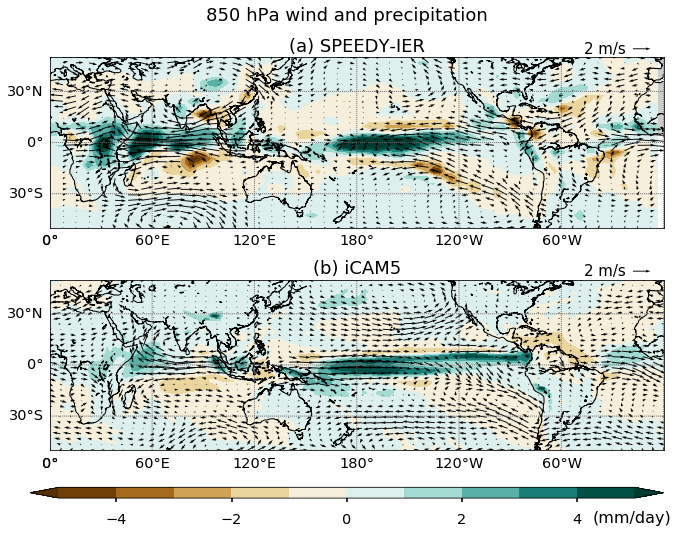

In [43]:
    # Basemap是地图投影库。projection指投影方式cyl(Cylindrical Equidistant)为圆柱投影；
    # 投影方式指定方法有两种：
    # 第一种  llcrnrlon：longitude of lower left hand corner of the desired map domain (degrees).所需映射域左下角的经度(度)。
    #         urcrnrlat：latitude of upper right hand corner of the desired map domain (degrees).所需映射域右上角的纬度(度)。
    # 第二种  width: 投影坐标中所需地图域的宽度(米)。     lon_0：所需映射域的中心(以度为单位)。
    #         height：期望地图域在投影坐标中的高度(米)。  lat_0：所需映射域的中心(以度为单位)。
    # resolution：数据库使用的边界分辨率。可以是c(粗)，l('L'低)，i(中)，h(高)，f(全)或无。
map = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=50,llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='l')
    # fig=plt.figure(figsize=(11,7.5))指创建一个画布,大小为11×7.5
fig=plt.figure(figsize=(11,7.5))
    # fig.suptitle('850 hPa wind and precipitation',fontsize=18,y=0.96)指上面的图名为xxx，字号18，y轴绝对位置是0.96
fig.suptitle('850 hPa wind and precipitation',fontsize=18,y=0.96)
    # ax1=fig.add_subplot(211)21指在画布上绘制一个字图，将子图划分为两行一列，1指现在选中的是第一个
ax1=fig.add_subplot(211)
    # ax1.set_title('(a) SPEEDY-IER') 设置图1子标题
ax1.set_title('(a) SPEEDY-IER')
    # 填充大陆，绘制海岸线。关键字参数zorder 相当于绘画次序越大画上去的越晚，zorder值越小就越先绘制，保证格网zorder最小即可
map.fillcontinents(zorder=0)
map.drawcoastlines()
    # drawmeridians()绘制经线，drawparallels绘制纬线。labels=[0,0,0,1]没理解什么意思。DimGray昏灰
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)
    # np.meshgrid()函数    生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_sp.values, lat_sp.values)
    # 将数据转化为字符
x1,y1 = map(lons, lats)
    # GY linspace(a,b,c） 生成c个a:b的等差数列
clevs=np.linspace(-5,5,11)
    #使用底图实例“map”在地图上创建填充等值线图。正在绘制的数据存储在变量“pr_diff_sp”中，并使用 contourf 函数绘制。
    #“x1”和“y1”变量可能分别包含数据的经度和纬度值。“clevs”变量包含要在绘图中使用的轮廓级别，而“cmap”变量指定要使用的颜色图。
    #“extend”参数用于指定如何处理等值线级别范围之外的数据值。“extend=both”表示应使用颜色图中的最小或最大颜色绘制范围之外的值。
cs=map.contourf(x1,y1,pr_diff_sp,clevs,cmap=plt.cm.BrBG,extend='both')
#cbar = map.colorbar(cs,location='bottom',pad=0.35)
#cbar.set_label('(mm/day)', labelpad=-16, x=0.95,y=-0.6, rotation=0)

uproj,vproj,xu,yu = map.transform_vector(u850_diff_sp.values,v850_diff_sp.values,lon_sp.values,lat_sp.values,48,32,returnxy=True,masked=True)
# now plot.
Q = map.quiver(xu,yu,uproj,vproj,width=0.0015,scale=70)
qk = plt.quiverkey(Q, 0.95, 1.05, 2, '2 m/s', labelpos='W',fontproperties={'size': '15'})

    #  ax2 指现在选中的是第二个
ax2=fig.add_subplot(212)
ax2.set_title('(b) iCAM5')
map.fillcontinents(zorder=0)
map.drawcoastlines()
    # GY np.arange() 生成数组，
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)

lons, lats = np.meshgrid(lon_cam, lat_cam)
x1,y1 = map(lons, lats)
clevs=np.linspace(-5,5,11)
cs=map.contourf(x1,y1,pr_diff_cam,clevs,cmap=plt.cm.BrBG,extend='both')
#cbar = map.colorbar(cs,location='bottom',pad=0.35)
#cbar.set_label('(mm/day)', labelpad=-16, x=0.95,y=-0.6, rotation=0)

uproj,vproj,xu,yu = map.transform_vector(UE_new[0,:,:]-UC_new[0,:,:],VE_new[0,:,:]-VC_new[0,:,:],lon_cam,lat_cam,60,32,returnxy=True,masked=True)
# now plot.
Q = map.quiver(xu,yu,uproj,vproj,width=0.0015,scale=70)
qk = plt.quiverkey(Q, 0.95, 1.05, 2, '2 m/s', labelpos='W',fontproperties={'size': '15'})

cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
cbar = fig.colorbar(cs, cax=cb_ax, orientation='horizontal')
cbar.set_label('(mm/day)', labelpad=-16, x=0.95,y=-0.6, rotation=0)
    # plt.savefig(fname,dpi,bbox_inches='tight',)名称，分辨率，输出图像紧凑
fig.savefig('precip_diff.pdf',dpi=300,bbox_inches='tight')

## Walker Circulation

In [46]:
# Averaged omega along latitudes in the tropics
# SPEEDY-IER
    #此代码计算两个数据集（sp1 和 sp2）在 -20 到 20 度纬度范围内的垂直速度 （omega） 的纬向平均值。
    #均值在时间和纬度维度上均取，从而生成分区均值 omega 值的一维数组。
    #然后，代码从 sp1 中减去 sp2 的区域平均欧米茄值，以获得两个数据集之间的差值。
omega_cross1_sp = sp1.omega.sel(lat=slice(-20,20)).mean(dim=['time','lat'])
omega_cross2_sp = sp2.omega.sel(lat=slice(-20,20)).mean(dim=['time','lat'])
omega_cross_diff_sp = omega_cross2_sp-omega_cross1_sp

In [47]:
# iCAM5
WE=np.load(dr+'CAM_VARS_OMEGA_2100.npy')[0:-2,:,31:161,:]
WC=np.load(dr+'CAM_VARS_OMEGA_modern.npy')[0:-2,:,31:161,:]

omega_cross1_cam=np.average(WC[:,:,43:87,:],axis=(0,2))
omega_cross2_cam=np.average(WE[:,:,43:87,:],axis=(0,2))
omega_cross_diff_cam = omega_cross2_cam-omega_cross1_cam

In [48]:
def latlonformat(lats,flag):
    '''
    Plot degree symbol and W/E/S/N for longitude/latitude
    lats: list of latitude or longitude
    flag: whether the input is latitude or longitude
        options: 'lat' and 'lon'
    Output:
    A list of lat/lon labels
    '''
    label_list=[]
    if flag=='lat':
        for lat in lats:
            if lat<0:
                label=str(int(-lat))+u'\u00B0S'
            elif lat>0:
                label=str(int(lat))+u'\u00B0N'
            else:
                label=str(int(lat))
            label_list.append(label)
    elif flag=='lon':
        for lat in lats:
            if lat>0 and lat<180:
                label=str(int(lat))+u'\u00B0E'
            elif lat>180 and lat<=360:
                label=str(int(360-lat))+u'\u00B0W'
            elif lat<0:
                label=str(int(-lat))+u'\u00B0W'
            else:
                label=str(int(lat))
            label_list.append(label)
    
    return label_list

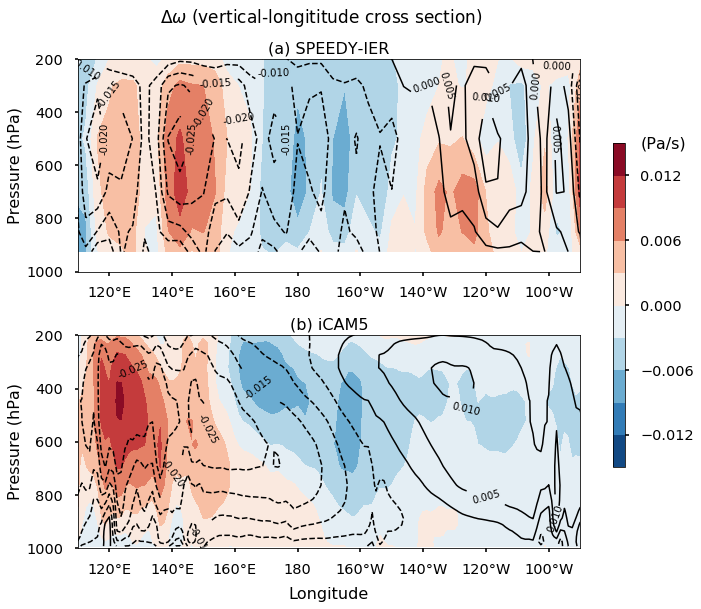

In [83]:
fig, ax = plt.subplots(2,figsize=(9,9))
fig.suptitle(r'$\Delta\omega$ (vertical-longititude cross section)',fontsize=17,y=0.96)
for i in range(2):
    
    clevs=np.linspace(-0.015,0.015,11)
    clevs2=np.linspace(-0.025,0.025,11)
    if i==0:
        cs=ax[i].contourf(lon_sp,lev_sp,omega_cross_diff_sp,clevs,cmap=plt.cm.RdBu_r)
        cs2=ax[i].contour(lon_sp,lev_sp,omega_cross1_sp,clevs2,colors='black')
        ax[i].set_title('(a) SPEEDY-IER',fontsize=16)
    else:
        cs=ax[i].contourf(lon_cam,lev_cam,omega_cross_diff_cam,clevs,cmap=plt.cm.RdBu_r)
        cs2=ax[i].contour(lon_cam,lev_cam,omega_cross1_cam,clevs2,colors='black')
        ax[i].set_title('(b) iCAM5',fontsize=16)
    #cbar = fig.colorbar(cs)
    #cbar.set_label('(Pa/s)', labelpad=-30, y=1.08, rotation=0)
    ax[i].set_xlim(110,270)
    ax[i].clabel(cs2, cs2.levels, inline=True, fontsize=10)
    a=ax[i].get_xticks().tolist()
    ax[i].set_xticklabels(latlonformat(a,'lon'))
    ax[i].set_ylim(200,1000)
    ax[i].set_ylabel('Pressure (hPa)')
    if i==1:
        ax[i].set_xlabel('Longitude',labelpad=10)
    ax[i].invert_yaxis()

fig.subplots_adjust(hspace=0.3)
cb_ax = fig.add_axes([0.95, 0.25, 0.02, 0.5])
cbar = fig.colorbar(cs, cax=cb_ax,orientation='vertical')
cbar.set_label('(Pa/s)', labelpad=-30, y=1.02, rotation=0)

fig.savefig('Omega_diff_Walker.pdf',dpi=300,bbox_inches='tight')

## Hadley Cell

In [84]:
# Zonal mean omega
# SPEEDY-IER
omega_zonal1_sp = sp1.omega.mean(dim=['time','lon'])
omega_zonal2_sp = sp2.omega.mean(dim=['time','lon'])
omega_zonal_diff_sp = omega_zonal2_sp - omega_zonal1_sp

In [85]:
# iCAM5
omega_zonal1_cam = np.average(WC,axis=(0,3))
omega_zonal2_cam = np.average(WE,axis=(0,3))
omega_zonal_diff_cam = omega_zonal2_cam - omega_zonal1_cam

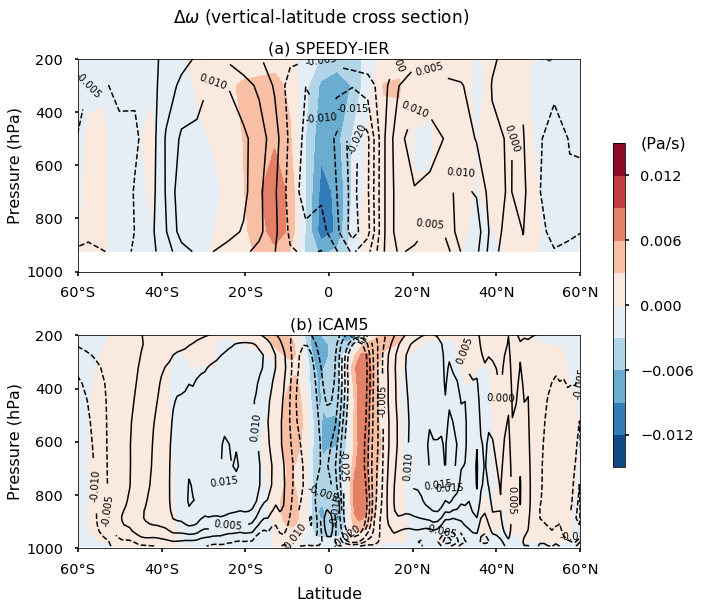

In [87]:
fig, ax = plt.subplots(2,figsize=(9,9))
fig.suptitle(r'$\Delta\omega$ (vertical-latitude cross section)',fontsize=17,y=0.96)
for i in range(2):
    
    clevs=np.linspace(-0.015,0.015,11)
    clevs2=np.linspace(-0.025,0.025,11)
    if i==0:
        cs=ax[i].contourf(lat_sp,lev_sp,omega_zonal_diff_sp,clevs,cmap=plt.cm.RdBu_r)
        cs2=ax[i].contour(lat_sp,lev_sp,omega_zonal1_sp,clevs2,colors='black')
        ax[i].set_title('(a) SPEEDY-IER',fontsize=16)
    else:
        cs=ax[i].contourf(lat_cam,lev_cam,omega_zonal_diff_cam,clevs,cmap=plt.cm.RdBu_r)
        cs2=ax[i].contour(lat_cam,lev_cam,omega_zonal1_cam,clevs2,colors='black')
        ax[i].set_title('(b) iCAM5',fontsize=16)
    #cbar = fig.colorbar(cs)
    #cbar.set_label('(Pa/s)', labelpad=-30, y=1.08, rotation=0)
    ax[i].set_xlim(-60,60)
    ax[i].clabel(cs2, cs2.levels, inline=True, fontsize=10)
    a=ax[i].get_xticks().tolist()
    ax[i].set_xticklabels(latlonformat(a,'lat'))
    ax[i].set_ylim(200,1000)
    ax[i].set_ylabel('Pressure (hPa)')
    if i==1:
        ax[i].set_xlabel('Latitude',labelpad=10)
    ax[i].invert_yaxis()

fig.subplots_adjust(hspace=0.3)
cb_ax = fig.add_axes([0.95, 0.25, 0.02, 0.5])
cbar = fig.colorbar(cs, cax=cb_ax,orientation='vertical')
cbar.set_label('(Pa/s)', labelpad=-30, y=1.02, rotation=0)

fig.savefig('Omega_diff_Hadley.pdf',dpi=300,bbox_inches='tight')

## Temperature

In [89]:
# iCAM5 temperature
TE=np.load(dr+'CAM_VARS_T_2100.npy')[0:-2,:,31:161,:]
TC=np.load(dr+'CAM_VARS_T_modern.npy')[0:-2,:,31:161,:]

In [95]:
# Zonal mean temperature change
# SPEEDY-IER
temp_zonal_diff_sp =sp2.temp.mean(dim=['time','lon'])-sp1.temp.mean(dim=['time','lon'])
# iCAM5
temp_zonal1_cam=np.average(TC,axis=(0,3))
temp_zonal2_cam=np.average(TE,axis=(0,3))
temp_zonal_diff_cam = temp_zonal2_cam - temp_zonal1_cam

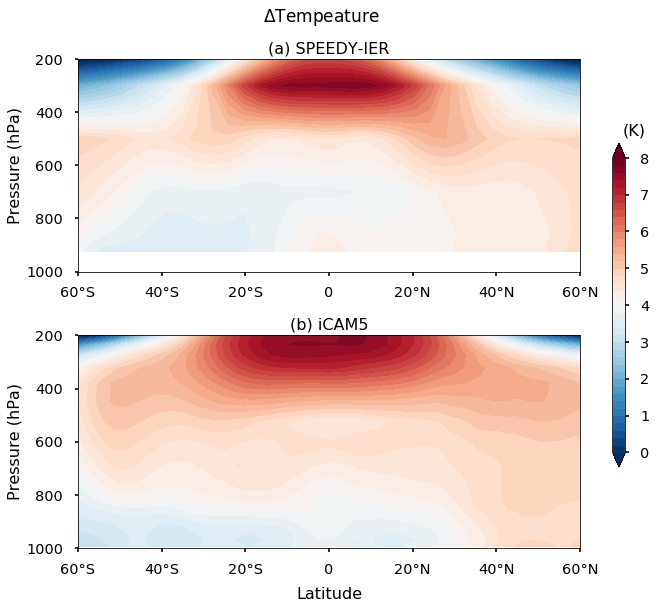

In [99]:
fig, ax = plt.subplots(2,figsize=(9,9))
fig.suptitle(r'$\Delta$Tempeature',fontsize=17,y=0.96)
for i in range(2):
    
    clevs=np.linspace(0,8,41)
    if i==0:
        cs=ax[i].contourf(lat_sp,lev_sp,temp_zonal_diff_sp,clevs,cmap=plt.cm.RdBu_r,extend='both')
        ax[i].set_title('(a) SPEEDY-IER',fontsize=16)
    else:
        cs=ax[i].contourf(lat_cam,lev_cam,temp_zonal_diff_cam,clevs,cmap=plt.cm.RdBu_r,extend='both')
        ax[i].set_title('(b) iCAM5',fontsize=16)

    ax[i].set_xlim(-60,60)
    a=ax[i].get_xticks().tolist()
    ax[i].set_xticklabels(latlonformat(a,'lat'))
    ax[i].set_ylim(200,1000)
    ax[i].set_ylabel('Pressure (hPa)')
    if i==1:
        ax[i].set_xlabel('Latitude',labelpad=10)
    ax[i].invert_yaxis()

fig.subplots_adjust(hspace=0.3)
cb_ax = fig.add_axes([0.95, 0.25, 0.02, 0.5])
cbar = fig.colorbar(cs, cax=cb_ax,orientation='vertical')




fig.savefig('Temp_diff.pdf',dpi=300,bbox_inches='tight')

## Convective precipitation ratio

In [15]:
# get precipitation
# SPEEDY-IER
pr1_sp = sp1.precls +sp1.precnv
large1_sp = sp1.precls
conv1_sp = sp1.precnv

conv_ratio_sp = conv1_sp.mean(dim='time')/pr1_sp.mean(dim='time')*100

In [16]:
# iCAM5
PC_conv = np.load(dr+'CAM_PRECIP_CNV_modern.npy')[0:-2,31:161,:]
PC=np.load(dr+'CAM_VARS_PRECIP_modern.npy')[0:-2,31:161,:]

PC_conv = PC_conv*86400*1000
PC = PC*86400*1000

PC_conv_mean = np.average(PC_conv,axis=0)
PC_mean = np.average(PC,axis=0)

conv_ratio_cam = PC_conv_mean/PC_mean*100

/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


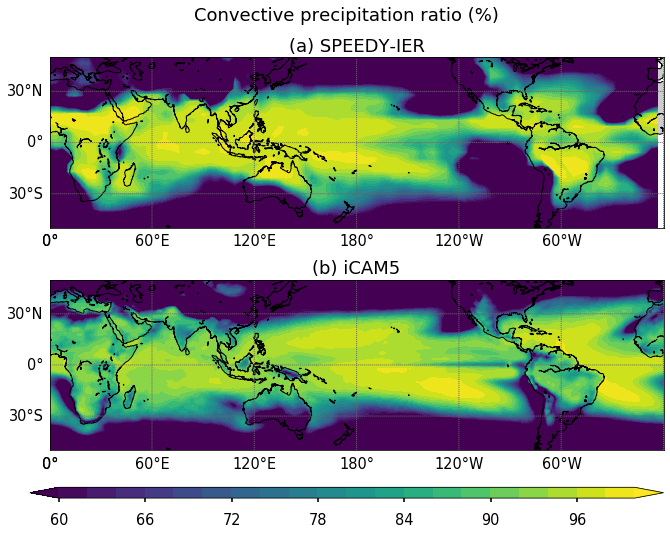

In [22]:
map = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=50,llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='l')
fig=plt.figure(figsize=(11,7.5))
fig.suptitle('Convective precipitation ratio (%)',fontsize=18,y=0.96)

ax1=fig.add_subplot(211)
ax1.set_title('(a) SPEEDY-IER')
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)

lons, lats = np.meshgrid(lon_sp.values, lat_sp.values)
x1,y1 = map(lons, lats)
clevs=np.linspace(60,100,21)
cs=map.contourf(x1,y1,conv_ratio_sp,clevs,cmap=plt.cm.viridis,extend='both')

ax2=fig.add_subplot(212)
ax2.set_title('(b) iCAM5')
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)

lons, lats = np.meshgrid(lon_cam, lat_cam)
x1,y1 = map(lons, lats)
cs=map.contourf(x1,y1,conv_ratio_cam,clevs,cmap=plt.cm.viridis,extend='both')

cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
cbar = fig.colorbar(cs, cax=cb_ax, orientation='horizontal')
#cbar.set_label('(mm/day)', labelpad=-16, x=0.95,y=-0.6, rotation=0)

fig.savefig('conv_precip_ratio.pdf',dpi=300,bbox_inches='tight')

/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


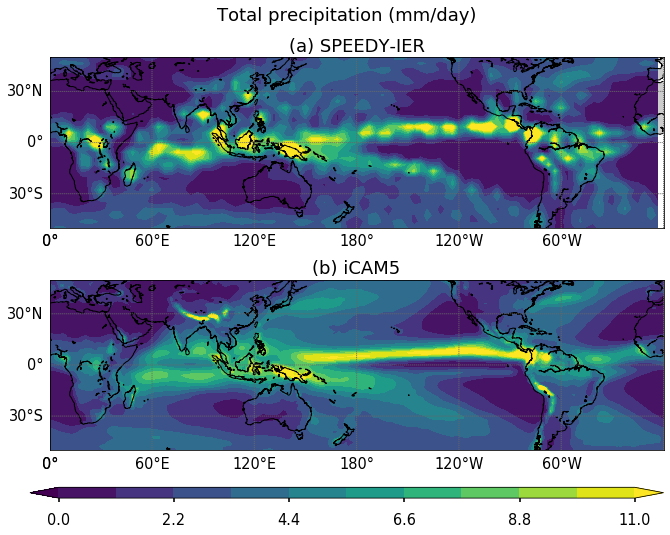

In [17]:
map = Basemap(projection='cyl',llcrnrlat=-50,urcrnrlat=50,llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='l')
fig=plt.figure(figsize=(11,7.5))
fig.suptitle('Total precipitation (mm/day)',fontsize=18,y=0.96)

ax1=fig.add_subplot(211)
ax1.set_title('(a) SPEEDY-IER')
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)

lons, lats = np.meshgrid(lon_sp.values, lat_sp.values)
x1,y1 = map(lons, lats)
clevs=np.linspace(0,11,11)
cs=map.contourf(x1,y1,pr1_sp.mean(dim='time'),clevs,cmap=plt.cm.viridis,extend='both')

ax2=fig.add_subplot(212)
ax2.set_title('(b) iCAM5')
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=14.5)
map.drawparallels(np.arange(-60,60,30),labels=[1,0,0,0],color='DimGray',fontsize=14.5)

lons, lats = np.meshgrid(lon_cam, lat_cam)
x1,y1 = map(lons, lats)
cs=map.contourf(x1,y1,PC_mean,clevs,cmap=plt.cm.viridis,extend='both')

cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
cbar = fig.colorbar(cs, cax=cb_ax, orientation='horizontal')
#cbar.set_label('(mm/day)', labelpad=-16, x=0.95,y=-0.6, rotation=0)